<a href="https://colab.research.google.com/github/joaochenriques/HydroFit/blob/main/Fit_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as mpl
import numpy as np
from scipy.optimize import curve_fit

import pathlib, subprocess, os
import pandas as pd

def cmdcall( cmd, verbose=True ):
    output = subprocess.getoutput( cmd )
    if verbose: print(output)

In [2]:
if not pathlib.Path("mpl_utils.py").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

from IPython.display import display, clear_output

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3921  100  3921    0     0  10007      0 --:--:-- --:--:-- --:--:-- 10028


In [3]:
def normalize( x ):
    m = np.max(x)
    return x / m, m

def characteristic_length( x ):
    return normalize( 1.0 / np.sqrt( x ) )[0]

def fit_func( x, ϕ0, α, p ):
    return ϕ0 + α * x**p

In [4]:
cmdcall( 'curl -O https://raw.githubusercontent.com/joaochenriques/HydroFit/main/DeltaWind.zip' )
cmdcall( 'unzip DeltaWind.zip' )

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4318  100  4318    0     0  13820      0 --:--:-- --:--:-- --:--:-- 13795
Archive:  DeltaWind.zip
  inflating: DeltaWind HAMS_Ainf(3,3).csv  
  inflating: DeltaWind HAMS_B(3,3,1.00 rad_s).csv  
  inflating: DeltaWind HAMS_C(3,3).csv  
  inflating: DeltaWind HAMS_F(3,0deg,1.00 rad_s).csv  
  inflating: DeltaWind WAMIT_Ainf(3,3).csv  
  inflating: DeltaWind WAMIT_B(3,3,1.00 rad_s).csv  
  inflating: DeltaWind WAMIT_C(3,3).csv  
  inflating: DeltaWind WAMIT_F(3,0deg,1.00 rad_s).csv  


In [12]:
df = pd.read_csv( 'DeltaWind HAMS_Ainf(3,3).csv', skiprows=[0,1], header=None, sep=';' )
df

,0,1,2,3,4,5,6,7
0,855,27775378.25,8.183384,2287.0,2.539913e+07,1.071952,855.0,2.567435e+07
1,1105,27657739.00,7.725186,3258.0,2.592752e+07,0.986107,14759.0,2.567435e+07
2,1524,27317603.00,6.400377,5944.0,2.564576e+07,0.111346,NaN,NaN
3,2287,26845590.50,4.561918,8719.0,2.553079e+07,0.559138,NaN,NaN
4,3258,26633231.00,3.734791,14759.0,2.567435e+07,0.000000,NaN,NaN
5,5944,26198128.75,2.040094,NaN,NaN,NaN,NaN,NaN
6,8719,26033780.25,1.399967,NaN,NaN,NaN,NaN,NaN
7,14759,25885391.00,0.822000,NaN,NaN,NaN,NaN,NaN


In [15]:
h = characteristic_length( np.array( df[0] ) )
u, u_max = normalize( np.array( df[1] ) )
h, u

(array([1.        , 0.87963382, 0.7490151 , 0.61143455, 0.51228014,
        0.37926578, 0.31314805, 0.24068808]),
 array([1.        , 0.99576462, 0.98351867, 0.96652475, 0.95887915,
        0.94321411, 0.93729706, 0.93195458]))

In [16]:
popt, pcov = curve_fit(fit_func, h[4:], u[4:] )#, p0 = np.array([9.94950174e-01, 6.56537013e+03, 2.86395369e+00]) )
popt

array([0.92441872, 0.13202781, 2.00839916])

25676079.64200947

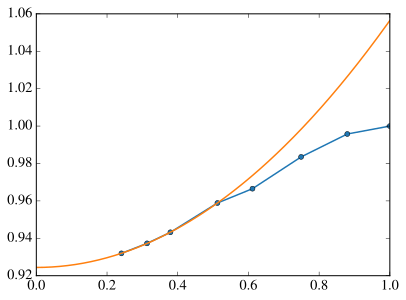

In [17]:
h0 = np.linspace( 0.0, 1.0, 500 )
y0 = fit_func( h0, *popt )
y0

mpl.plot( h, u, 'o-' );
mpl.plot( h0, y0, '-' );
popt[0]*u_max